Test data - mutations

Installing a new python package

In [ ]:
!pip install imbalanced-learn
!pip install mlrose

In [ ]:
! pip install -Iv pandas==1.1.0
! pip install lazypredict


# Import some libraries

In [ ]:
from collections import Counter
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from google.colab import files
import io
from sklearn.metrics import classification_report, confusion_matrix
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Utils: funtions for visulisation

1. Confusion Matrix function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def confusionMatrixPlot(y_true_arg, y_score_arg):
  # Get and reshape confusion matrix data
  matrix = confusion_matrix(y_true_arg, y_score_arg)
  matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

  # Build the plot
  plt.figure(figsize=(5,5))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size':10},
              cmap=plt.cm.Greens, linewidths=0.2)

  # Add labels to the plot
  class_names = ['control', 'patient']
  tick_marks = np.arange(len(class_names))
  tick_marks2 = tick_marks + 0.5
  plt.xticks(tick_marks, class_names, rotation=25)
  plt.yticks(tick_marks2, class_names, rotation=0)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title('Confusion Matrix')
  plt.show()

Uploading data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fileControle1='drive/MyDrive/project_final_ML/NodupC045_changO_mutations.csv'
file8='drive/MyDrive/project_final_ML/index_8_mutations.csv'
file5='drive/MyDrive/project_final_ML/index_5_ch_mutations.csv'
fileControle2='drive/MyDrive/project_final_ML/NodupP170_changO_mutations.csv'



Creating dataframes

In [ ]:
import pandas as pd

dfControl1 = pd.read_csv(fileControle1)
df8 = pd.read_csv(file8)
df5 = pd.read_csv(file5)
dfControl2 = pd.read_csv(fileControle2)


# Pre-Processing:


1. Adding a binary column (status) of patient-1/ control-1
2. Concatenate the controls and patients dataframe
3. replace all Nan values into 0


In [ ]:
dfControl1['status'] = 0
dfControl2['status'] = 0
df5['status'] = 1
df8['status'] = 1

In [ ]:
df=pd.concat([dfControl1 ,dfControl2,df8 ,df5])
df = df.fillna(0)

In [ ]:
df

,sample,tree_id,nodes,sequences,source_a,source_c,source_g,source_t,transition,transversion,source_hydrophilic,source_hydrophobic,dest_hydrophilic,dest_hydrophobic,hydro_keep,hydro_change,source_neutral,source_negative,source_positive,dest_neutral,dest_negative,dest_positive,charge_keep,charge_change,r,s,cdr1,cdr2,cdr3,CDR,fwr1,fwr2,fwr3,FWR,all_mutations,all_muts_by_tree_topology,status
0,NodupC045_mutation_changO,9,3,2,5.0,2.0,5.0,1.0,6.0,7.0,4.0,3.0,4.0,5.0,9,4,10,1.0,2.0,8,1.0,4.0,9,4,10.0,3.0,3.0,2.0,0.0,5,1.0,1.0,6.0,8,13,13.0,0
1,NodupC045_mutation_changO,10,3,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0.0,0.0,1,0.0,0.0,1,0,0.0,1.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0,1,1.0,0
2,NodupC045_mutation_changO,21,4,2,2.0,6.0,4.0,4.0,7.0,9.0,2.0,2.0,6.0,3.0,11,5,14,1.0,1.0,13,2.0,1.0,14,2,9.0,7.0,1.0,3.0,3.0,7,0.0,3.0,6.0,9,16,14.0,0
3,NodupC045_mutation_changO,24,4,2,3.0,5.0,3.0,2.0,7.0,6.0,2.0,6.0,1.0,7.0,10,3,12,1.0,0.0,12,0.0,1.0,12,1,9.0,4.0,0.0,4.0,1.0,5,0.0,1.0,7.0,8,13,13.0,0
4,NodupC045_mutation_changO,25,4,2,7.0,9.0,5.0,4.0,11.0,14.0,4.0,10.0,5.0,15.0,16,9,24,0.0,1.0,22,2.0,1.0,23,2,18.0,7.0,2.0,4.0,1.0,7,3.0,3.0,8.0,14,25,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,index_5_ch,2051,68,66,38.0,21.0,17.0,30.0,63.0,43.0,28.0,25.0,29.0,27.0,62,44,86,7.0,13.0,78,8.0,20.0,85,21,70.0,36.0,8.0,12.0,29.0,49,0.0,15.0,41.0,56,106,106.0,1
1647,index_5_ch,2053,132,130,50.0,28.0,29.0,47.0,93.0,61.0,38.0,44.0,37.0,50.0,81,73,130,13.0,11.0,121,13.0,20.0,131,23,121.0,33.0,16.0,15.0,34.0,65,2.0,18.0,65.0,85,154,154.0,1
1648,index_5_ch,2054,129,126,60.0,32.0,27.0,41.0,101.0,59.0,43.0,49.0,46.0,51.0,92,68,131,12.0,17.0,118,10.0,32.0,123,37,125.0,35.0,14.0,17.0,26.0,57,1.0,32.0,69.0,102,160,158.0,1
1649,index_5_ch,2055,129,124,66.0,33.0,34.0,54.0,115.0,72.0,51.0,63.0,56.0,57.0,119,68,149,14.0,24.0,141,16.0,30.0,159,28,129.0,58.0,28.0,18.0,33.0,79,2.0,23.0,82.0,107,187,187.0,1


# For the differents Models
1. Define input/output     
2. Split the data into train and test set    
3. Scaling

In [ ]:
# defining the input/output
X = df.iloc[:, 2:].values
y = df.iloc[:, -1].values

In [ ]:
# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling exept for categorical features
sc = StandardScaler()
X_train[:,0:] = sc.fit_transform(X_train[:,0:]) 
X_test[:,0:] = sc.transform(X_test[:,0:])

# Model with the resampler: RandomOverSampler()


# Resampling the train part

In [ ]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_train_after_ros, y_train_after_ros = ros.fit_resample(X_train, y_train)
# new class distribution 
print(Counter(y_train_after_ros))
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 15115, 0: 15115})
Counter({0: 15115, 1: 2229})
Counter({0: 5051, 1: 731})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Lets examing some models using lazy predictor

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_after_ros, X_test, y_train_after_ros, y_test)

print(models)

### Lets examin the KNN model
First we will train the KNN algorithm, and defined the K to be 5, arbitary

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_ros = KNeighborsClassifier(n_neighbors=5)
classifier_ros.fit(X_train_after_ros, y_train_after_ros)

KNeighborsClassifier()

We will predict the train and the test set

In [ ]:
y_pred_test_ros = classifier_ros.predict(X_test)
y_pred_train_ros = classifier_ros.predict(X_train_after_ros)

We will test how successful the predictions were on train

In [ ]:
print(confusion_matrix(y_train_after_ros, y_pred_train_ros))
print(classification_report(y_train_after_ros, y_pred_train_ros))

[[15114     1]
 [    0 15115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15115
           1       1.00      1.00      1.00     15115

    accuracy                           1.00     30230
   macro avg       1.00      1.00      1.00     30230
weighted avg       1.00      1.00      1.00     30230



We will test how successful the predictions were on test

In [ ]:
print(confusion_matrix(y_test, y_pred_test_ros))
print(classification_report(y_test, y_pred_test_ros))

[[5050    1]
 [   0  731]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5051
           1       1.00      1.00      1.00       731

    accuracy                           1.00      5782
   macro avg       1.00      1.00      1.00      5782
weighted avg       1.00      1.00      1.00      5782



Confusion Matrix on train set

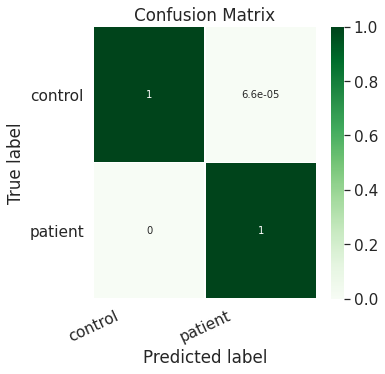

In [ ]:
confusionMatrixPlot(y_train_after_ros, y_pred_train_ros)

Confusion Matrix on test set

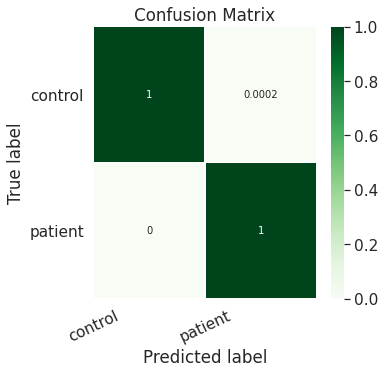

In [ ]:
confusionMatrixPlot(y_test, y_pred_test_ros)

We will test the influance of the number of the nearest neihgbohrs of the accuracy of the model

Text(0, 0.5, 'Mean Error')

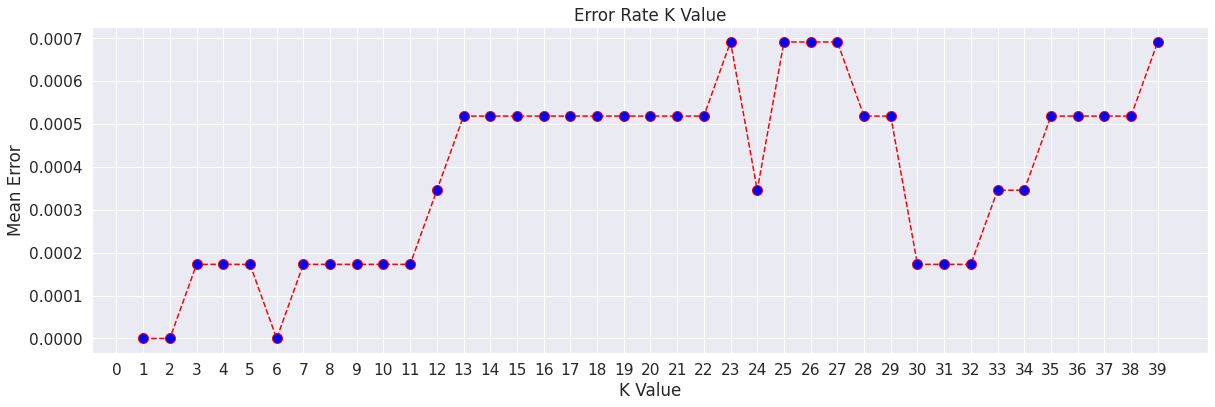

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_after_ros, y_train_after_ros)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(0, 40, 1.0))
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Model with the resampler: SMOTH()

In [ ]:

oversample = SMOTE()


In [ ]:
X_train_after_sm, y_train_after_sm = oversample.fit_resample(X_train, y_train)
classifier_sm = KNeighborsClassifier(n_neighbors=5)
classifier_sm.fit(X_train_after_sm, y_train_after_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


KNeighborsClassifier()

In [ ]:
y_pred_train_sm = classifier_sm.predict(X_train_after_sm)
y_pred_test_sm = classifier_sm.predict(X_test)

In [ ]:
print(confusion_matrix(y_train_after_sm, y_pred_train_sm))
print(classification_report(y_train_after_sm, y_pred_train_sm))

[[15115     0]
 [    0 15115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15115
           1       1.00      1.00      1.00     15115

    accuracy                           1.00     30230
   macro avg       1.00      1.00      1.00     30230
weighted avg       1.00      1.00      1.00     30230



In [ ]:
print(confusion_matrix(y_test, y_pred_test_sm))
print(classification_report(y_test, y_pred_test_sm))

[[5050    1]
 [   1  730]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5051
           1       1.00      1.00      1.00       731

    accuracy                           1.00      5782
   macro avg       1.00      1.00      1.00      5782
weighted avg       1.00      1.00      1.00      5782



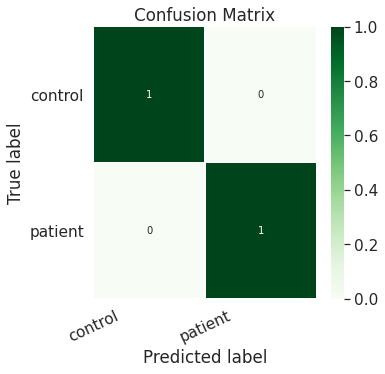

In [ ]:
confusionMatrixPlot(y_train_after_sm, y_pred_train_sm)

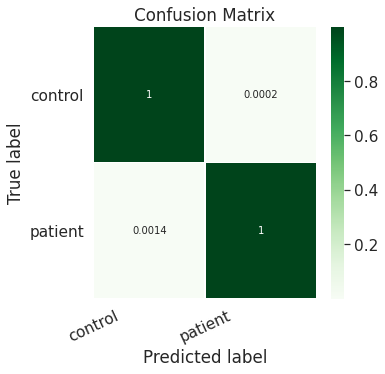

In [ ]:
confusionMatrixPlot(y_test, y_pred_test_sm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_after_sm, y_train_after_sm)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Mean Error')

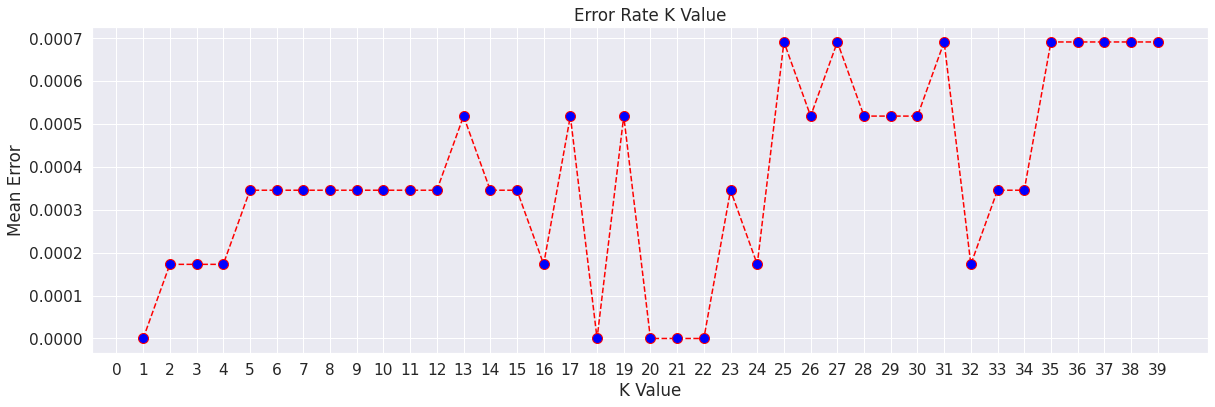

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(np.arange(1,40,1), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(0, 40, 1.0))
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')